# This document explores a dataset containing Loan Data from Prosper for 113937 loans.

In [1]:
# import all packages and set plots to be embedded inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print rowa, columns

df = pd.read_csv('loan.csv')
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**What is the structure of the dataset?**

There are 113937 loans in the dataset with 81 features. Variables are both numeric and categorical.

I'll choose 14 columns for our analysis

In [3]:
dfx = df[['LoanKey', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Term', 'BorrowerRate',
          'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
          'IsBorrowerHomeowner', 'IncomeVerifiable', 'StatedMonthlyIncome', 'TotalProsperLoans', 'Recommendations']]

dfx.sample(5)

,LoanKey,LoanOriginalAmount,MonthlyLoanPayment,Term,BorrowerRate,ListingCategory (numeric),Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,Recommendations
56642,9C5936797164690522EFF7C,2000,67.38,36,0.1299,6,Other,Other,30.0,True,True,2500.000000,1.0,0
63855,7AB43423465569082A31218,7500,268.43,36,0.1770,1,Administrative Assistant,Full-time,87.0,True,True,2666.666667,NaN,0
105232,B5FB36470050262421A3A2F,6500,223.70,36,0.1449,14,Other,Employed,13.0,False,True,3400.000000,2.0,0
47771,2CE23697120633130186DC7,8500,309.00,36,0.1840,1,Teacher,Employed,37.0,False,True,3499.833333,NaN,0
65587,16C7342014857400718CBCA,1000,32.50,36,0.1050,4,Professional,Full-time,10.0,True,True,3000.000000,NaN,0


In [109]:
# Variables Information #

dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113937 non-null  object 
 1   LoanOriginalAmount         113937 non-null  int64  
 2   MonthlyLoanPayment         113937 non-null  float64
 3   Term                       113937 non-null  int64  
 4   BorrowerRate               113937 non-null  float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   Occupation                 110349 non-null  object 
 7   EmploymentStatus           111682 non-null  object 
 8   EmploymentStatusDuration   106312 non-null  float64
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  IncomeVerifiable           113937 non-null  bool   
 11  StatedMonthlyIncome        113937 non-null  float64
 12  TotalProsperLoans          22085 non-null   float64
 13  Recommendations            11

In [14]:
# Descriptive statistics for numeric variables

dfx.describe()

,LoanOriginalAmount,MonthlyLoanPayment,Term,BorrowerRate,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,TotalProsperLoans,OnTimeProsperPayments,Investors,Recommendations
count,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,106312.000000,1.139370e+05,22085.000000,22085.000000,113937.000000,113937.000000
mean,8337.01385,272.475783,40.830248,0.192764,2.774209,96.071582,5.608026e+03,1.421100,22.271949,80.475228,0.048027
std,6245.80058,192.697812,10.436212,0.074818,3.996797,94.480605,7.478497e+03,0.764042,18.830425,103.239020,0.332353
min,1000.00000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
25%,4000.00000,131.620000,36.000000,0.134000,1.000000,26.000000,3.200333e+03,1.000000,9.000000,2.000000,0.000000
50%,6500.00000,217.740000,36.000000,0.184000,1.000000,67.000000,4.666667e+03,1.000000,15.000000,44.000000,0.000000
75%,12000.00000,371.580000,36.000000,0.250000,3.000000,137.000000,6.825000e+03,2.000000,32.000000,115.000000,0.000000
max,35000.00000,2251.510000,60.000000,0.497500,20.000000,755.000000,1.750003e+06,8.000000,141.000000,1189.000000,39.000000


## I-) Univariate Exploration

### 1- LoanKey ... just the id of loan

### 2- Distribution of LoanOriginalAmount 

In [15]:
dfx.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

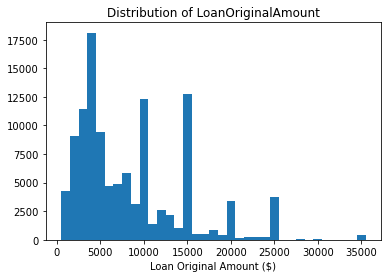

In [4]:
bins = np.arange(500, dfx.LoanOriginalAmount.max()+1500, 1000)
plt.hist(data = dfx, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)');
plt.title('Distribution of LoanOriginalAmount');

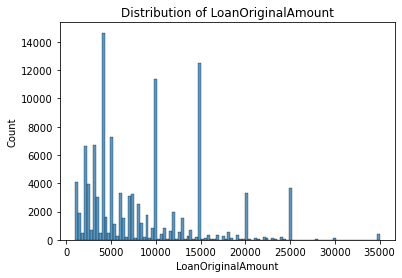

In [5]:
sb.histplot(dfx['LoanOriginalAmount']);
plt.title('Distribution of LoanOriginalAmount');

There are very large spikes in frequency at the bars with one thousand digit of precision (e.g. 2000, 3000, 4000, 5000) then every 5000 like (10000, 15000, 20000, 25000) frequency quickly trails off until the next spike. This is expected as the loan in most cases will be a whole number like 10,000, 15,000 20,000, rather than in hundreds or tens fractions.

### 3- Distribution of MonthlyLoanPayment

In [29]:
dfx.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

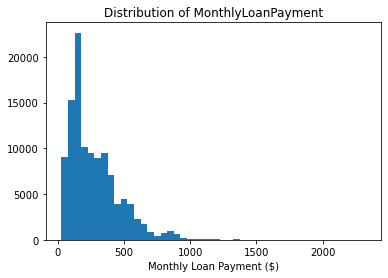

In [6]:
bins = np.arange(25, dfx.MonthlyLoanPayment.max()+75, 50)
plt.hist(data = dfx, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('Monthly Loan Payment ($)');
plt.title('Distribution of MonthlyLoanPayment');

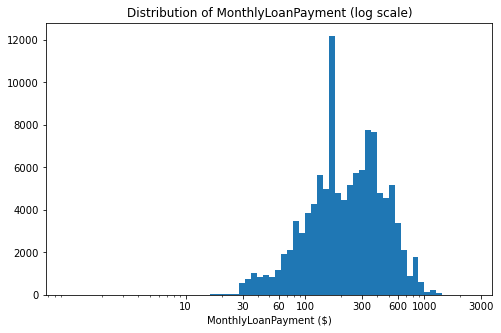

In [7]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(dfx['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = dfx, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 60, 100, 300, 600, 1000, 3000], [10, 30, 60, 100, 300, 600, 1000, 3000])
plt.xlabel('MonthlyLoanPayment ($)')
plt.title('Distribution of MonthlyLoanPayment (log scale)');
plt.show();

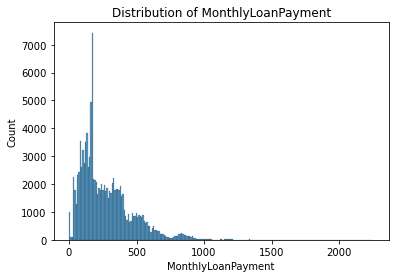

In [8]:
sb.histplot(dfx['MonthlyLoanPayment']);
plt.title('Distribution of MonthlyLoanPayment');

MonthlyLoanPayment has a long-tailed distribution, with a lot of payments on the low payments end and few on the high payments end.

When plotted on a log-scale, the payments distribution looks slightly bimodal with one long spike at about 150 usd and another slightly long spike at 350 usd.

### 4, 5, 6- Counting of Term, IsBorrowerHomeowner, IncomeVerifiable 

In [33]:
dfx.Term.describe()

count    113937.000000
mean         40.830248
std          10.436212
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

In [127]:
dfx.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [131]:
dfx.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [132]:
dfx.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

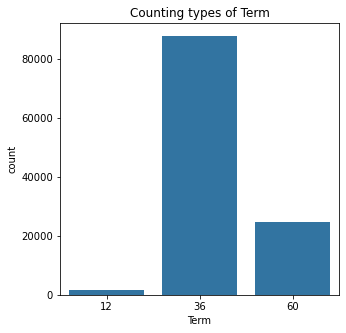

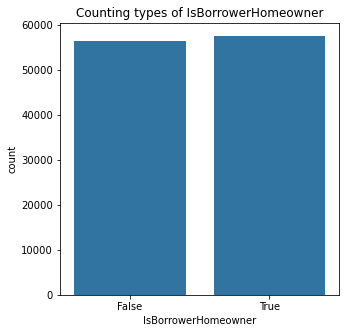

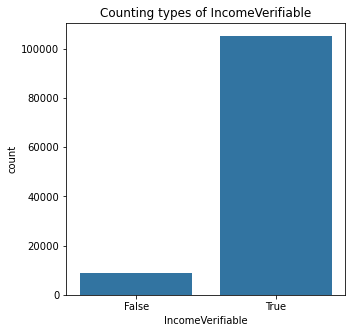

In [10]:
def countPlot_func(var):
    """ A function for quick countplot Boolean & Discrete variables """  
    plt.figure(figsize = [5, 5])
    base_color = sb.color_palette()[0]
    sb.countplot(data = dfx, x = var, color = base_color);
    plt.title(f'Counting types of {var}');

for var in ['Term', 'IsBorrowerHomeowner', 'IncomeVerifiable']:
    countPlot_func(var)

1- Only 3 values for length of the loan expressed in months (12,36,60)months.
From plot we can observe that the most choosen term is 36 months.

2- The Borrowers who are home owners are slightly more than the Borrowers who arn't.

3- The Borrowers who have income verification are much more the The Borrowers who haven't.

### 7- Distribution of BorrowerRate

In [4]:
dfx.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

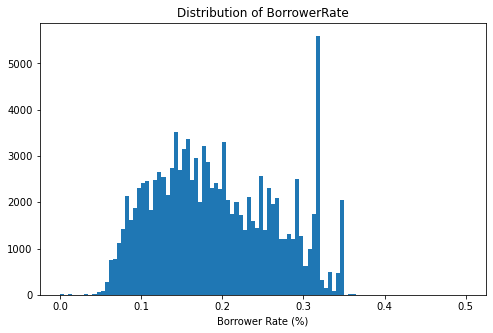

In [11]:
plt.figure(figsize = [8, 5]) 

bins = np.arange(0, dfx.BorrowerRate.max()+0.005, 0.005)
plt.hist(data = dfx, x = 'BorrowerRate', bins = bins);
plt.xlabel('Borrower Rate (%)');
plt.title('Distribution of BorrowerRate');

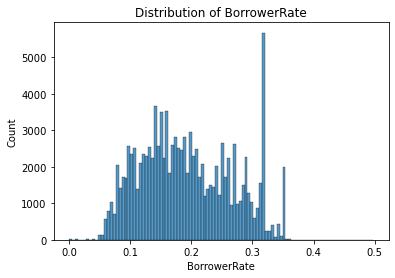

In [12]:
sb.histplot(dfx['BorrowerRate']);
plt.title('Distribution of BorrowerRate');

the Borrower Rate here shows nearly normal distribution around the mean with obvious spikes at many intervals and one long spike at nearly 0.32 %.

### 8- ListingCategory (numeric)

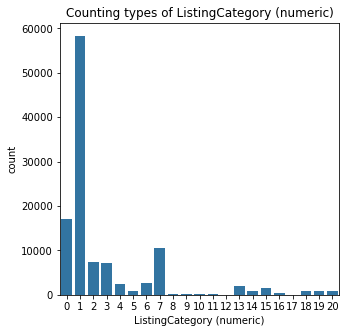

In [13]:
countPlot_func('ListingCategory (numeric)')

In [14]:
# a- renaming ListingCategory (numeric) to --> ListingCategory

dfx.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [15]:
# b- Changing ListingCategory column datatype from integer to category

dfx.ListingCategory = dfx.ListingCategory.astype('category')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [146]:
# testing

dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   LoanKey                   113937 non-null  object  
 1   LoanOriginalAmount        113937 non-null  int64   
 2   MonthlyLoanPayment        113937 non-null  float64 
 3   Term                      113937 non-null  int64   
 4   BorrowerRate              113937 non-null  float64 
 5   ListingCategory           113937 non-null  category
 6   Occupation                110349 non-null  object  
 7   EmploymentStatus          111682 non-null  object  
 8   EmploymentStatusDuration  106312 non-null  float64 
 9   IsBorrowerHomeowner       113937 non-null  bool    
 10  IncomeVerifiable          113937 non-null  bool    
 11  StatedMonthlyIncome       113937 non-null  float64 
 12  TotalProsperLoans         22085 non-null   float64 
 13  Recommendations           113

In [147]:
# value_counts

dfx.ListingCategory.value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory, dtype: int64

In [16]:
# c- replacing numeric values of loan categories by the actual names for enhancing data readability

categList = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 'Student Use', 
             'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
             'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV', 'Taxes', 
             'Vacation', 'Wedding Loans']
for x in range(21):
    dfx.ListingCategory.replace(x, categList[x], inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [7]:
# testing

dfx.ListingCategory.value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

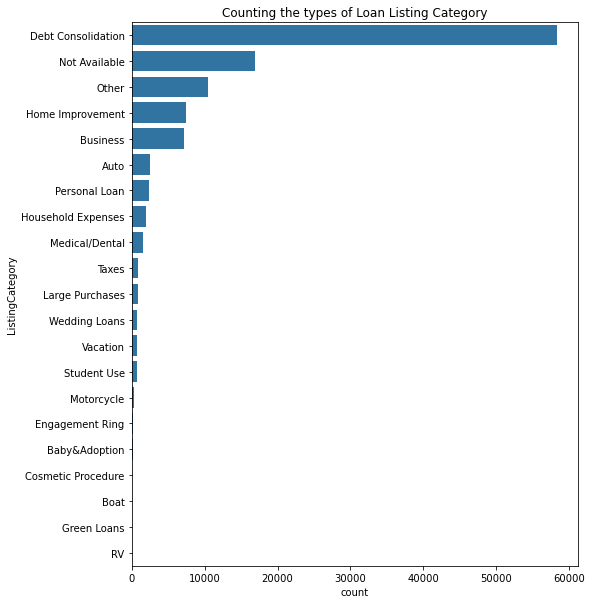

In [18]:
plt.figure(figsize = [8, 10]) 

categories_order = dfx['ListingCategory'].value_counts().index

base_color = sb.color_palette()[0]
sb.countplot(data = dfx, y = 'ListingCategory', color = base_color, order = categories_order);
plt.title('Counting the types of Loan Listing Category');

After excluding the undefined categories like 'Not Available' and 'Others', it appears that's the most occuring loan category is **"Debt Consolidation"** followed by **"Home Improvement"** and **"Business"** followed by **"Personal Loan"** and **"Household Expenses"** as The Top 5 Categories.

### 9- Occupation

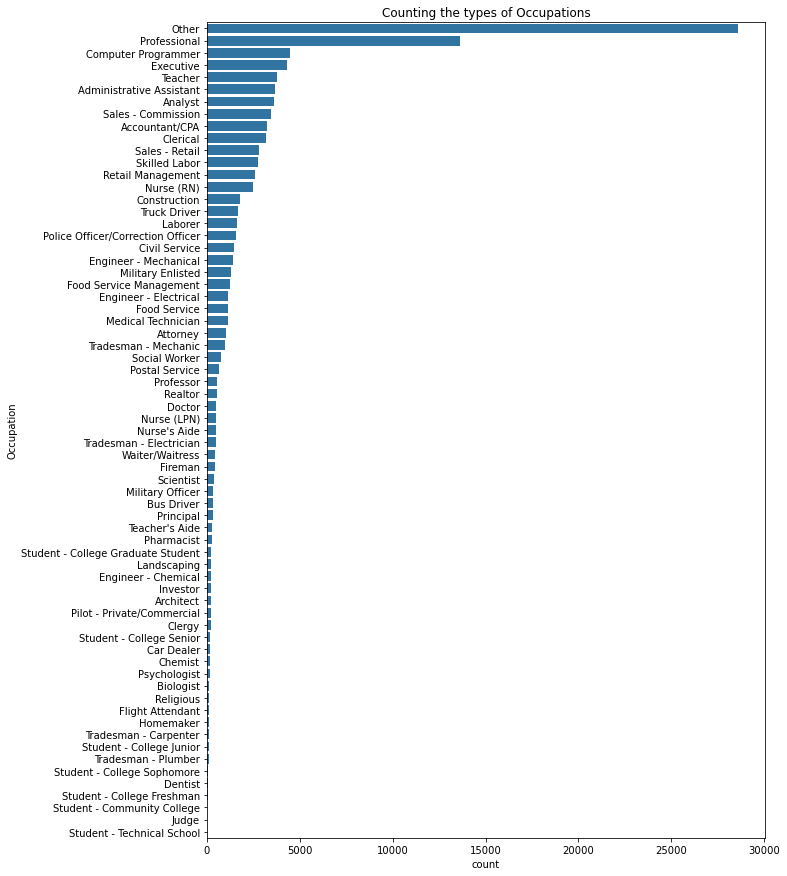

In [19]:
plt.figure(figsize = [10, 15]) 

occ_order = dfx['Occupation'].value_counts().index

sb.countplot(data = dfx, y = 'Occupation', color = base_color, order = occ_order);
plt.title('Counting the types of Occupations');

After excluding the undefined Occupations like 'Other' and 'Professional', we can observe that's the most occuring borrowers occupations are **"Computer Programmer", "Excutives", "Teacher", "Administrative Assistant" and "Analyst"**

### 10- EmploymentStatus

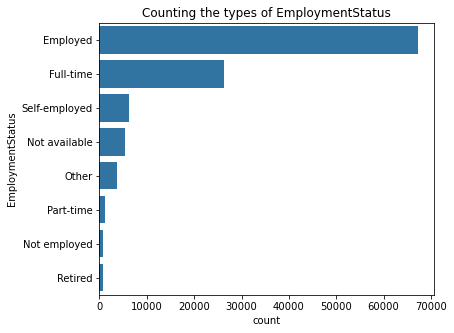

In [20]:
plt.figure(figsize = [6, 5]) 

empStat_order = dfx['EmploymentStatus'].value_counts().index

sb.countplot(data = dfx, y = 'EmploymentStatus', color = base_color, order = empStat_order);

plt.title('Counting the types of EmploymentStatus');

It's obvious that's the most occuring loans are for **"Employed", "Full-time" and "Self-employed"** borrowers.

### 11- Distribution of EmploymentStatusDuration

In [158]:
dfx.EmploymentStatusDuration.describe()

count    106312.000000
mean         96.071582
std          94.480605
min           0.000000
25%          26.000000
50%          67.000000
75%         137.000000
max         755.000000
Name: EmploymentStatusDuration, dtype: float64

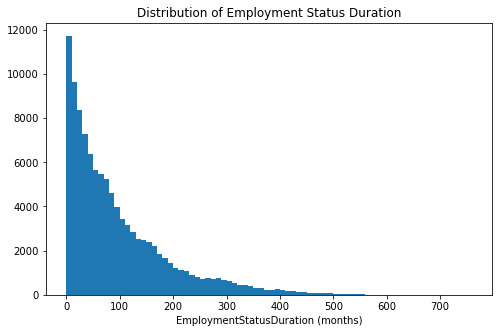

In [21]:
plt.figure(figsize = [8, 5]) 

bins = np.arange(0, dfx.EmploymentStatusDuration.max()+10, 10)
plt.hist(data = dfx, x = 'EmploymentStatusDuration', bins = bins);
plt.xlabel('EmploymentStatusDuration (months)');
plt.title('Distribution of Employment Status Duration');

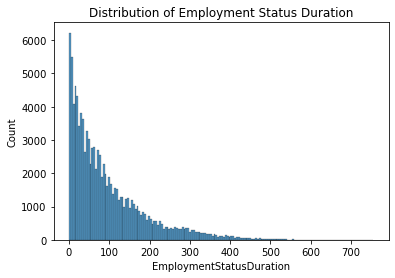

In [22]:
sb.histplot(dfx['EmploymentStatusDuration']);
plt.title('Distribution of Employment Status Duration');

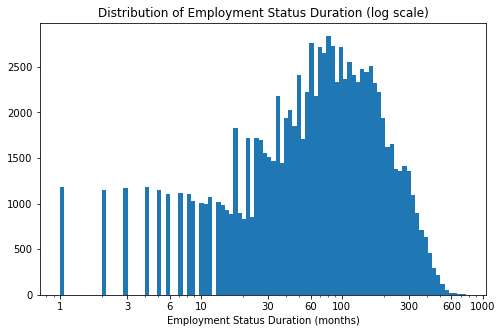

In [23]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.03
bins = 10 ** np.arange(0, np.log10(dfx['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = dfx, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 6, 10, 30, 60, 100, 300, 600, 1000], [1, 3, 6, 10, 30, 60, 100, 300, 600, 1000])
plt.xlabel('Employment Status Duration (months)')
plt.title('Distribution of Employment Status Duration (log scale)');
plt.show();

EmploymentStatusDuration has a long-tailed distribution, with a lot of Employment Durations under 100 months and few above 100 months.

When plotted on a log-scale, the EmploymentStatusDuration distribution looks slightly normal with mean appeared at about 70 months.

### 12- Distribution of StatedMonthlyIncome

In [166]:
dfx.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

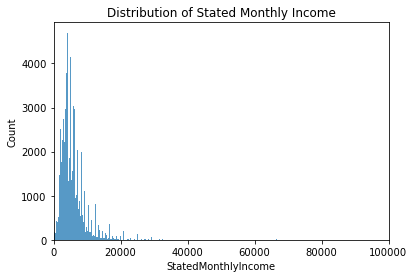

In [24]:
sb.histplot(dfx['StatedMonthlyIncome']);
plt.title('Distribution of Stated Monthly Income');
plt.xlim((0,100000));

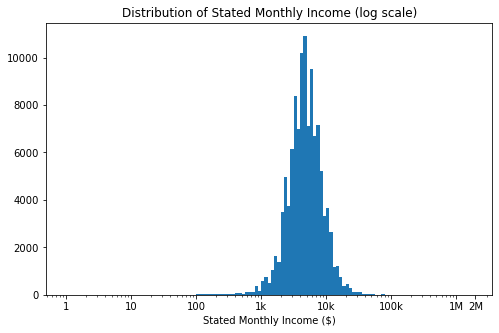

In [25]:
# Plotting on a log scale will be more clearer

log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(dfx['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = dfx, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 2000000], [1, 10, 100, '1k', '10k', '100k', '1M', '2M'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Distribution of Stated Monthly Income (log scale)');
plt.show();

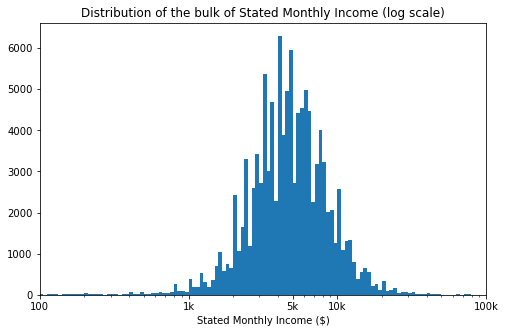

In [26]:
# Zooming into the bulk

log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(dfx['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = dfx, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([100, 1000, 5000, 10000, 100000], [100, '1k', '5k', '10k', '100k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Distribution of the bulk of Stated Monthly Income (log scale)');

plt.xlim((100,100000));
plt.show();

The majority of StatedMonthlyIncome is around the mean ~ 4700 $

### 13- TotalProsperLoans

In [60]:
dfx.TotalProsperLoans.value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

In [63]:
dfx.TotalProsperLoans.dtype

dtype('float64')

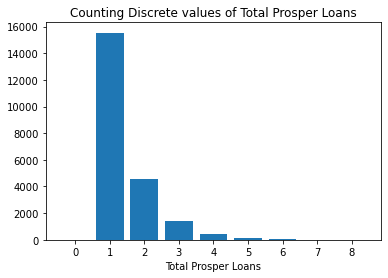

In [27]:
bins = np.arange(-0.5, 8.5+1, 1)
plt.hist(data = dfx, x = 'TotalProsperLoans',bins = bins, rwidth = 0.8);
plt.xticks(np.arange(0, 9, 1));
plt.xlabel('Total Prosper Loans');
plt.title('Counting Discrete values of Total Prosper Loans');

The majority of loans have low TotalProsperLoans, and minortiy of loans have higher TotalProsperLoans.

### 14- Recommendations

In [185]:
dfx.Recommendations.dtype, dfx.Recommendations.value_counts()

(dtype('int64'),
 0     109678
 1       3516
 2        568
 3        108
 4         26
 5         14
 9          6
 7          5
 6          4
 8          3
 16         2
 18         2
 24         1
 14         1
 19         1
 21         1
 39         1
 Name: Recommendations, dtype: int64)

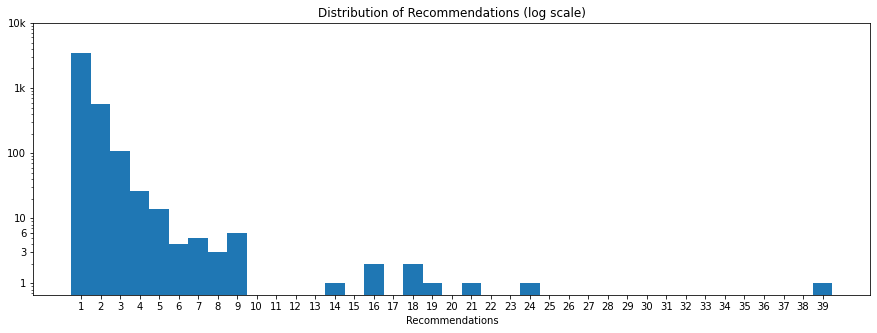

In [28]:
# Plotting on a log scale for y axis will be more clearer

plt.figure(figsize = [15, 5]) 

bins = np.arange(0.5, 40.5, 1)
plt.hist(data = dfx, x = 'Recommendations', bins = bins);
plt.xticks(np.arange(1,40,1))
plt.xlabel('Recommendations');
plt.title('Distribution of Recommendations (log scale)');

plt.yscale('log');
plt.yticks([1, 3, 6, 10, 100, 1000, 10000], [1, 3, 6, 10, 100, '1k', '10k']);

Excluding the value 0 of Recommendations, The majority of loans have low Recommendations, and minortiy of loans have higher Recommendations.

## II-) Bivariate Exploration

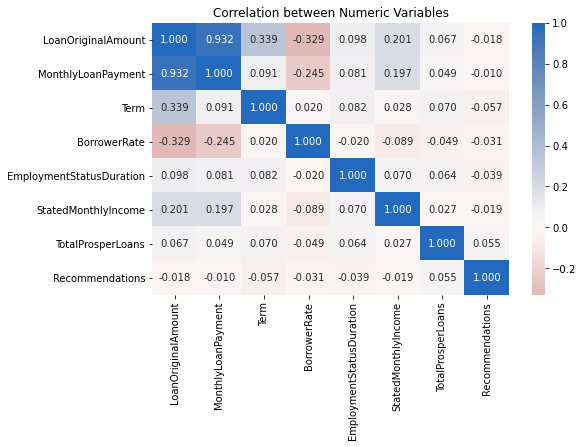

In [29]:
numeric_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment', 'Term', 'BorrowerRate', 'EmploymentStatusDuration',
                'StatedMonthlyIncome', 'TotalProsperLoans', 'Recommendations']

categoric_vars = ['ListingCategory', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']

# correlation plot

plt.figure(figsize = [8, 5])

sb.heatmap(dfx[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation between Numeric Variables');

plt.show();

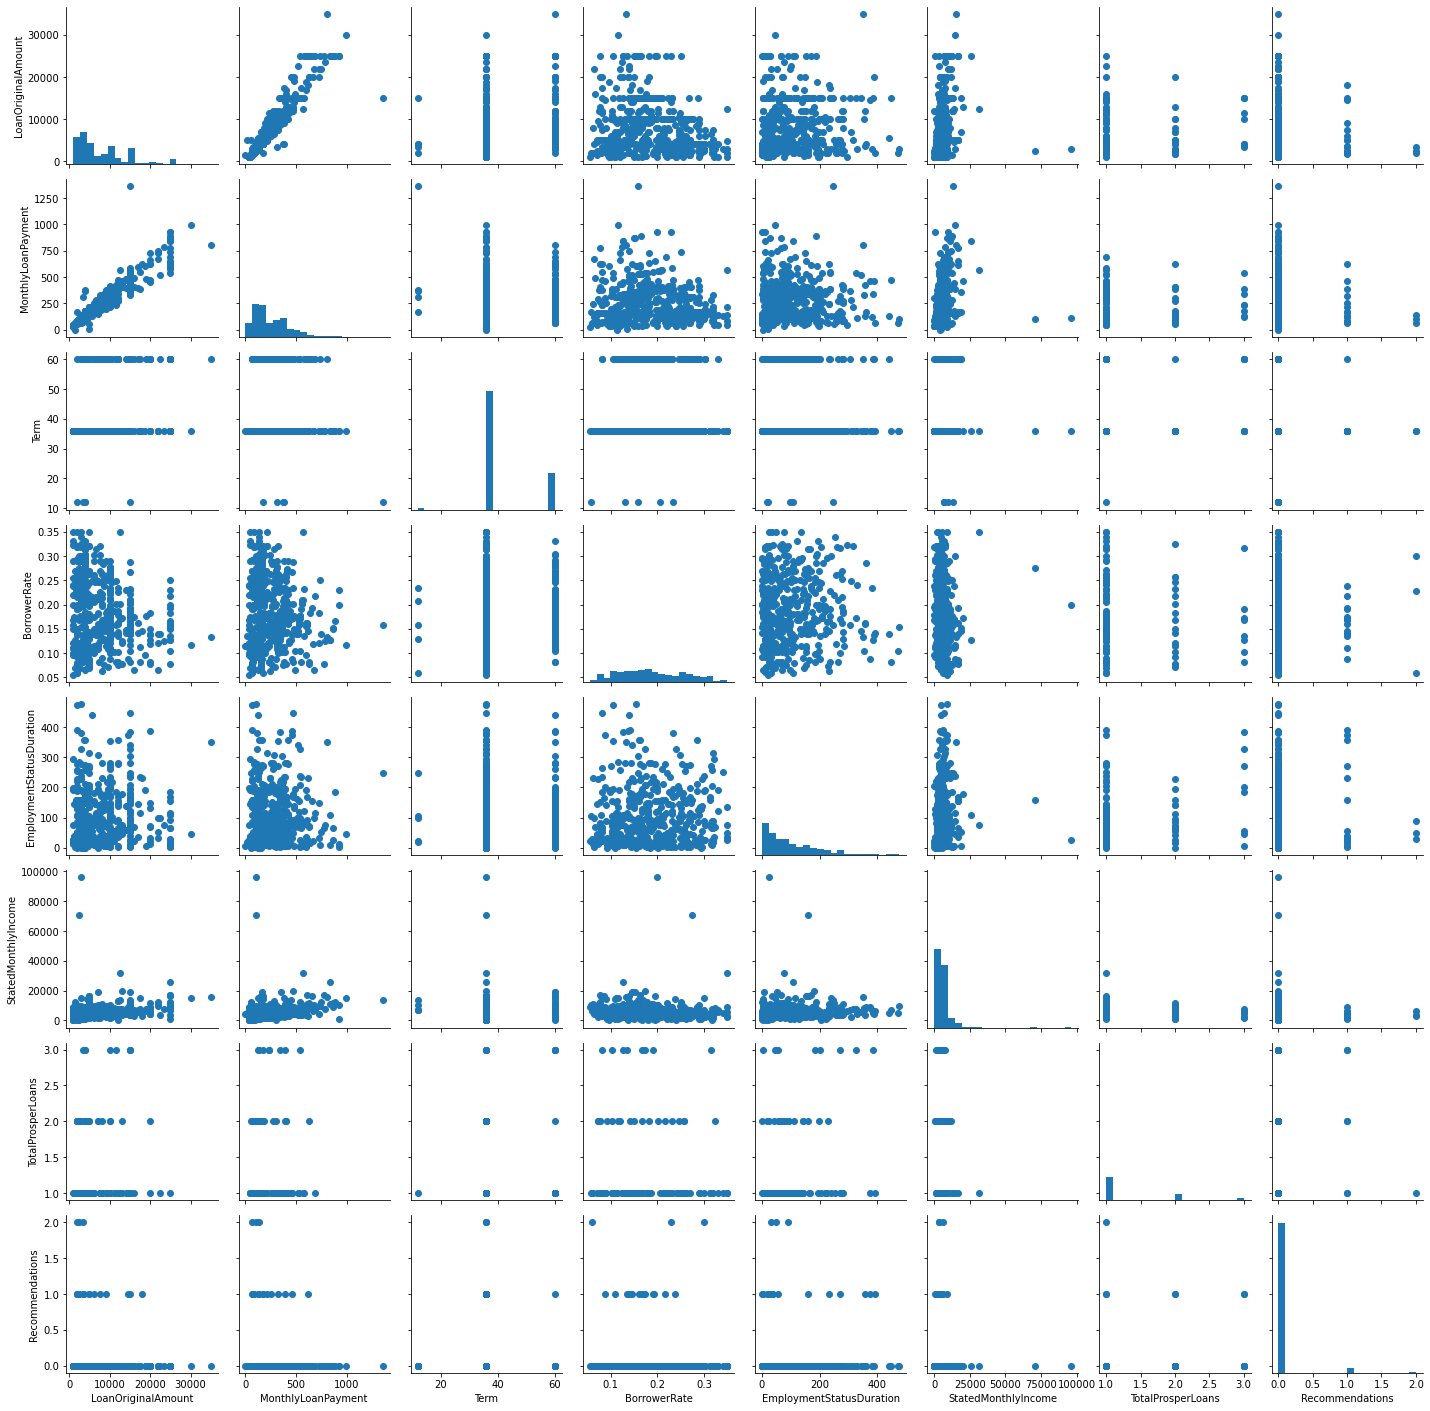

In [31]:
# plot matrix: sample 500 loans so that plots are clearer and they render faster

samples = np.random.choice(dfx.shape[0], 500, replace = False)
loans_samp = dfx.loc[samples,:]

g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter);

### 1- Let's see the relationship between LoanOriginalAmount & MonthlyLoanPayment via Scatter & regplot. I think it will be a positive relatioship for sure.

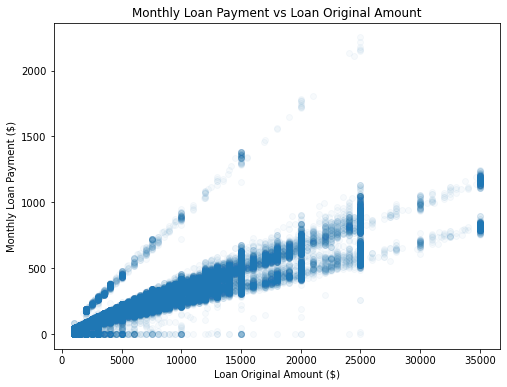

In [32]:
plt.figure(figsize = [8, 6])

plt.scatter(data = dfx, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', alpha = 1/30)

plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Monthly Loan Payment ($)')
plt.title('Monthly Loan Payment vs Loan Original Amount');
plt.show();

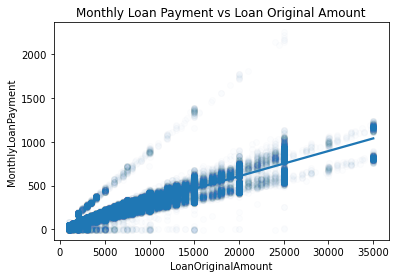

In [33]:
sb.regplot(data = dfx, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', x_jitter = 5, y_jitter = 5,
           scatter_kws = {'alpha' : 1/100});
plt.title('Monthly Loan Payment vs Loan Original Amount');

As Expected a positive relationship between Loan Original Amount and Monthly Loan Payment.

### 2- Let's see the relationship between LoanOriginalAmount and the 3 types of Term (12, 36 & 60 months) is there any relationship  and is there any major Term?

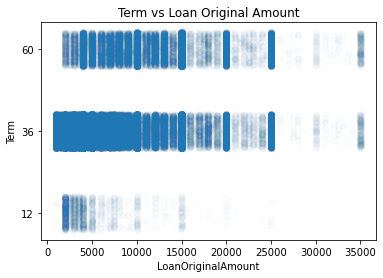

In [34]:
# 2- scatter plot of LoanOriginalAmount vs. Term

sb.regplot(data = dfx, x = 'LoanOriginalAmount', y = 'Term', fit_reg = False, x_jitter = 5, y_jitter = 5,
           scatter_kws = {'alpha' : 1/100});

plt.title('Term vs Loan Original Amount');

plt.yticks([12, 36, 60], [12, 36, 60]);

It apprears that the most chosen Term is 36 months ... Then the short term of 12 months is mostly for small original loans ... And the long term of 60 months is mostly for big original loans.

### 3- What's the relationship between StatedMonthlyIncome & LoanOriginalAmount look like? Is there a difference between high and low income borrowers in the amount of loan?

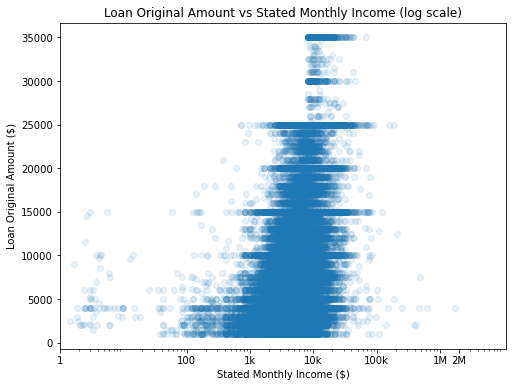

In [35]:
plt.figure(figsize = [8, 6])

plt.scatter(data = dfx, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', alpha = 1/10)

plt.xscale('log')
plt.xticks([1, 100, 1000, 10000, 100000, 1000000, 2000000], [1, 100, '1k', '10k', '100k', '1M', '2M'])

plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('Loan Original Amount vs Stated Monthly Income (log scale)');
plt.show();

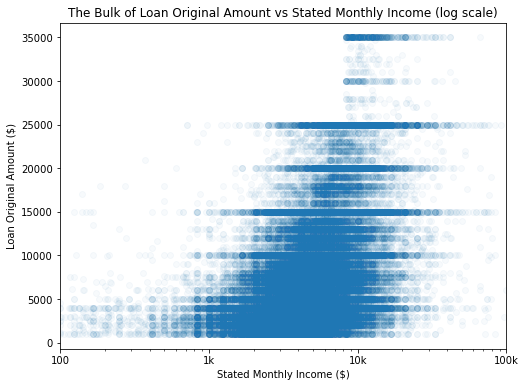

In [36]:
# zooming

plt.figure(figsize = [8, 6])

plt.scatter(data = dfx, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', alpha = 1/30)

plt.xscale('log')
plt.xlim((100,100000))
plt.xticks([100, 1000, 10000, 100000], [100, '1k', '10k', '100k'])

plt.title('Loan Original Amount over Stated Monthly Income')

plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('Loan Original Amount ($)')
plt.title('The Bulk of Loan Original Amount vs Stated Monthly Income (log scale)');
plt.show();

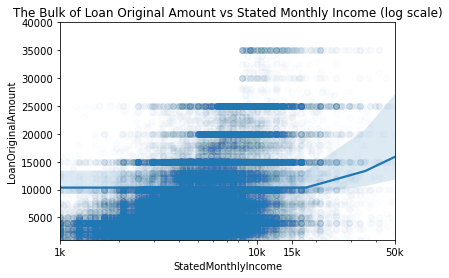

In [37]:
sb.regplot(data = dfx, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', y_jitter = 50,
           scatter_kws = {'alpha' : 1/100});

plt.title('The Bulk of Loan Original Amount vs Stated Monthly Income (log scale)');

plt.xscale('log')
plt.xlim((1000,50000))
plt.xticks([1000, 10000, 15000, 50000], ['1k', '10k', '15k','50k'])
plt.ylim((1000,40000));

In general lower incomes tend to have lower loans, and for higher monthly income after 15,000 usd it appears that they tend to have higher loans above 10,000 usd.

### 4- The answer here is obviously known as Term increases the Monthly Payment will decreases.

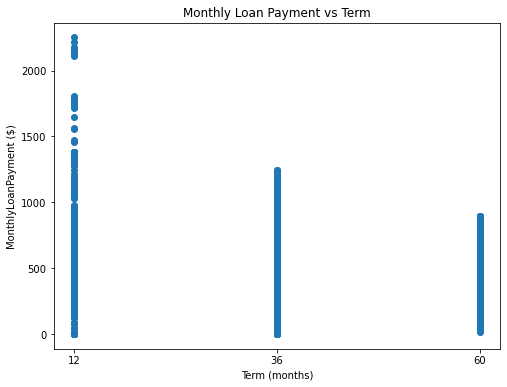

In [39]:
plt.figure(figsize = [8, 6])

plt.scatter(data = dfx, x = 'Term', y = 'MonthlyLoanPayment')

plt.xticks([12, 36, 60], [12, 36, 60])

plt.xlabel('Term (months)')
plt.ylabel('MonthlyLoanPayment ($)')
plt.title('Monthly Loan Payment vs Term');
plt.show();

As Expected as the term is longer, the monthly loan payment will decrease.

### 5- Does the number of Total Prosper Loans affect the Borrower Rate?

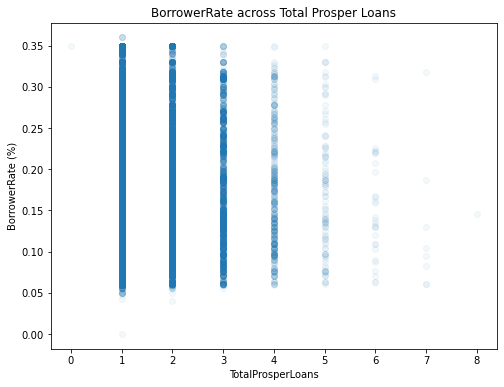

In [40]:
plt.figure(figsize = [8, 6])

plt.scatter(data = dfx, x = 'TotalProsperLoans', y = 'BorrowerRate', alpha = 1/20)

plt.xlabel('TotalProsperLoans')
plt.ylabel('BorrowerRate (%)')
plt.title('BorrowerRate across Total Prosper Loans');
plt.show();

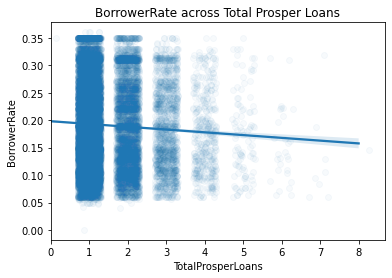

In [41]:
sb.regplot(data = dfx, x = 'TotalProsperLoans', y = 'BorrowerRate', fit_reg = True, x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/30});
plt.title('BorrowerRate across Total Prosper Loans');

As the Total Prosper Loans increase, there's a slight decrease in Borrower Rate.

### 6, 7- Does the type of Loan Listing Category affect both Loan Original Amount & Borrower Rate?

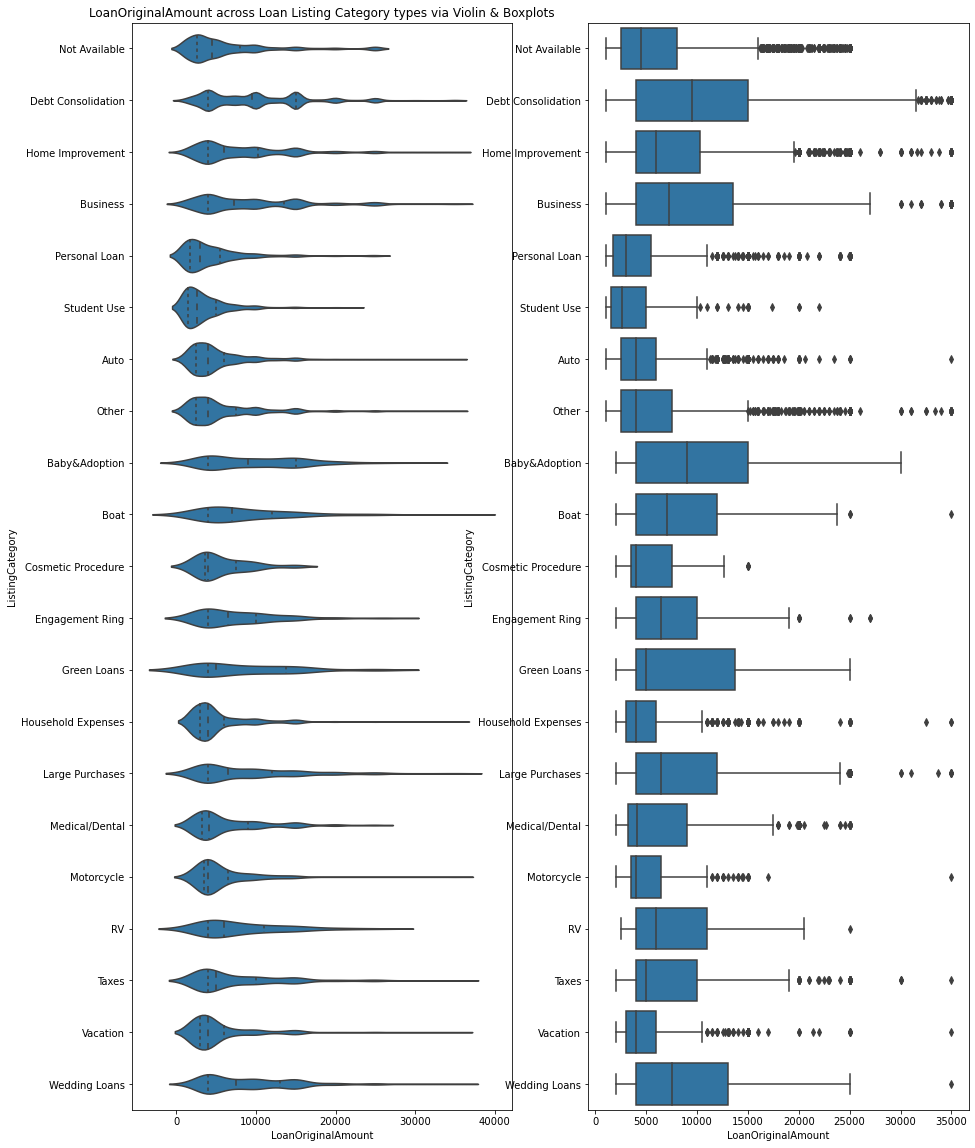

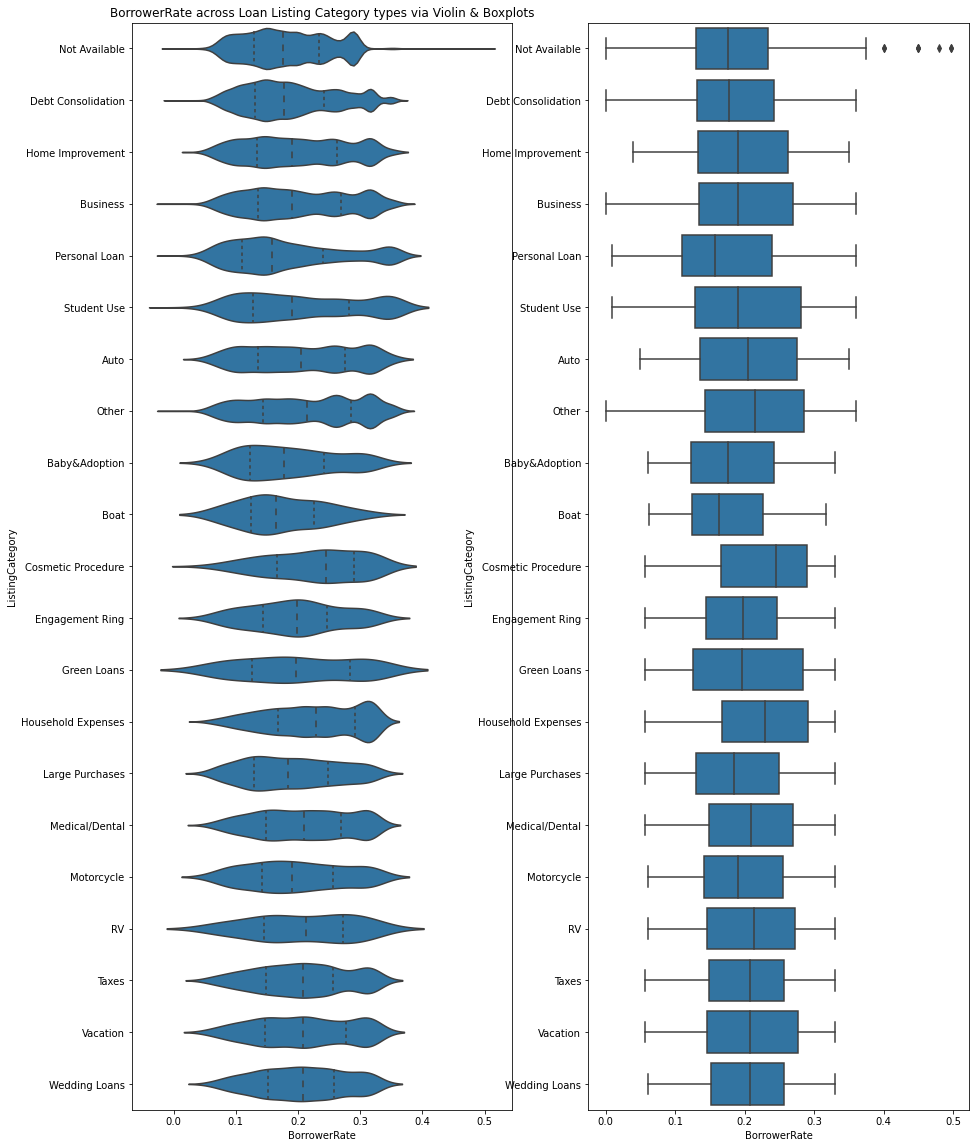

In [43]:
base_color = sb.color_palette()[0]

for var in ['LoanOriginalAmount', 'BorrowerRate']:
    plt.figure(figsize = [15, 20])

    # LEFT plot: violin plot
    plt.subplot(1, 2, 1)
    sb.violinplot(data = dfx, y = 'ListingCategory', x = var, inner = 'quartile', color=base_color);
    plt.title(f'{var} across Loan Listing Category types via Violin & Boxplots');

    # RIGHT plot: box plot
    plt.subplot(1, 2, 2)
    sb.boxplot(data = dfx, y = 'ListingCategory', x = var,  color=base_color);

Debt consolidation Baby&Adoption Wedding loans have higher average Loan Originl Amount.

Cosmetic Procedures has the highest average Borrow Rate.

### 8- Do certain types of Occupations have a different Loan Original Amount on average?

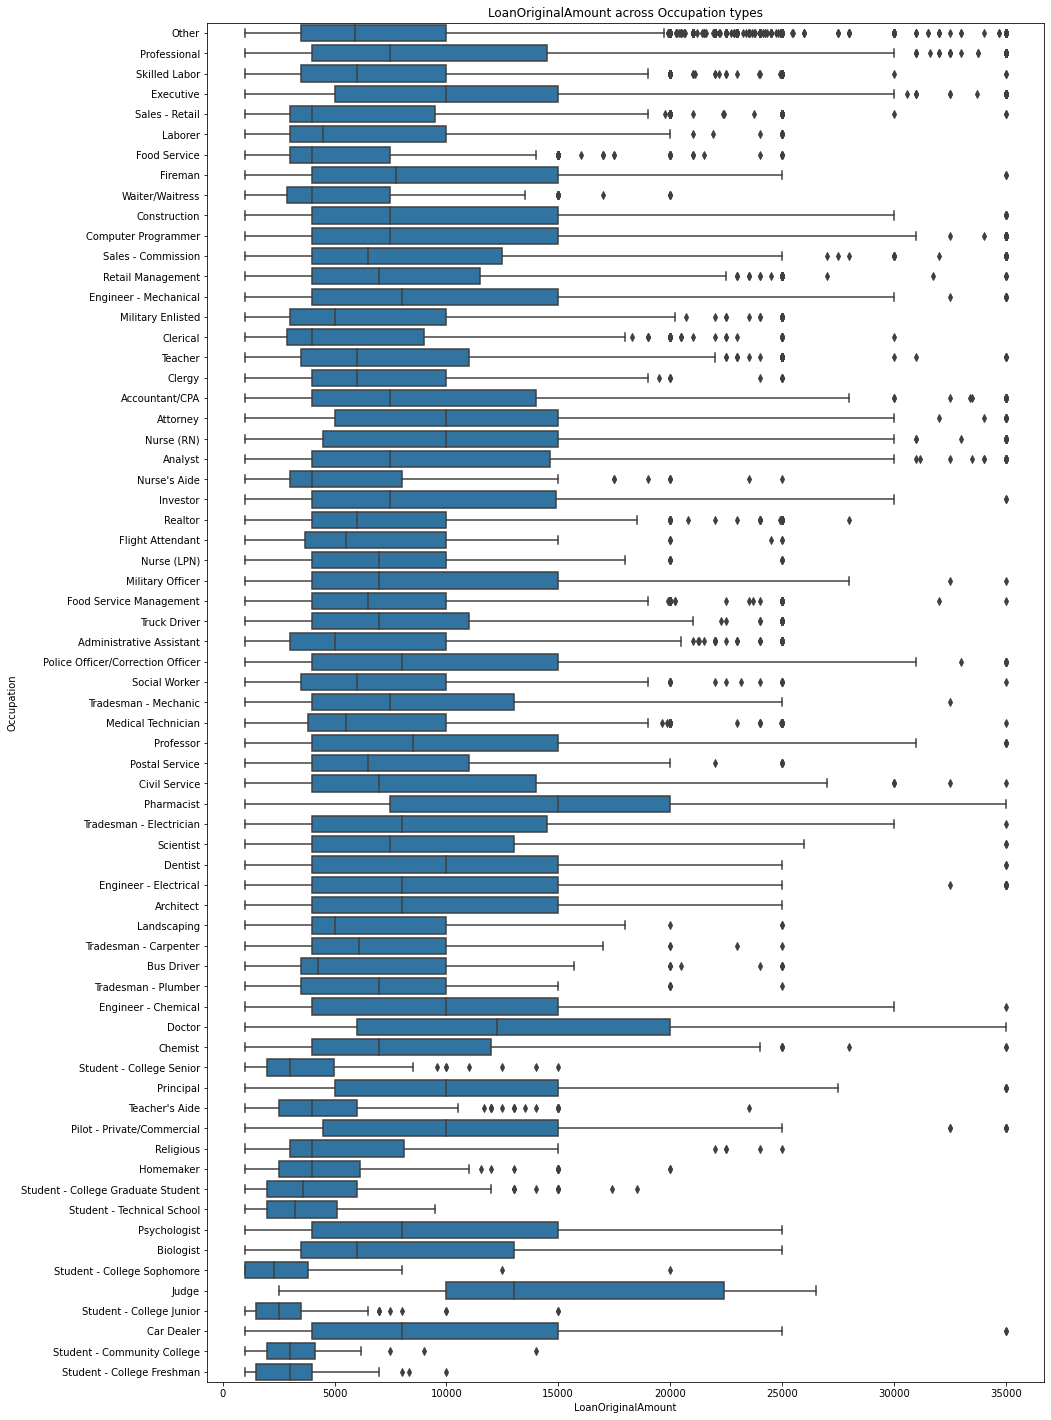

In [44]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [15, 25])

sb.boxplot(data = dfx, y = 'Occupation', x = 'LoanOriginalAmount',  color=base_color);
plt.title('LoanOriginalAmount across Occupation types');

Pharmacist at the 1st place then Judge and Doctor are the top 3 of having the highest average Loan Originl Amount.

### 9, 10, 11, 12, 13, 14- Do the Employment Status, Is Borrower Home Owner, Income Verifiable have an effect on the Loan Original Amount and BorrowerRate?

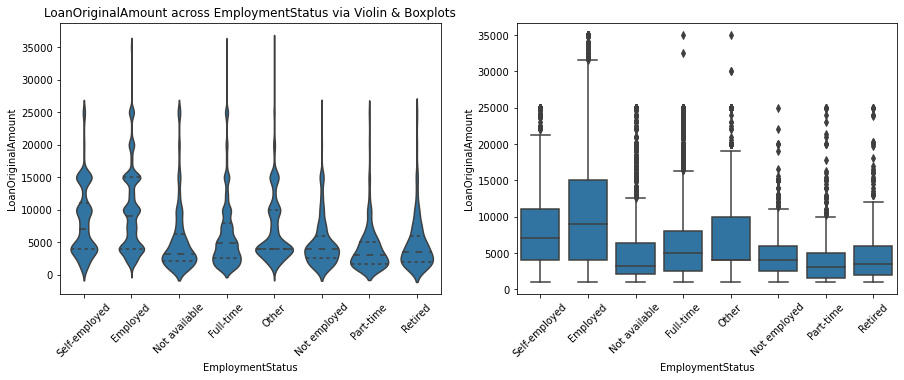

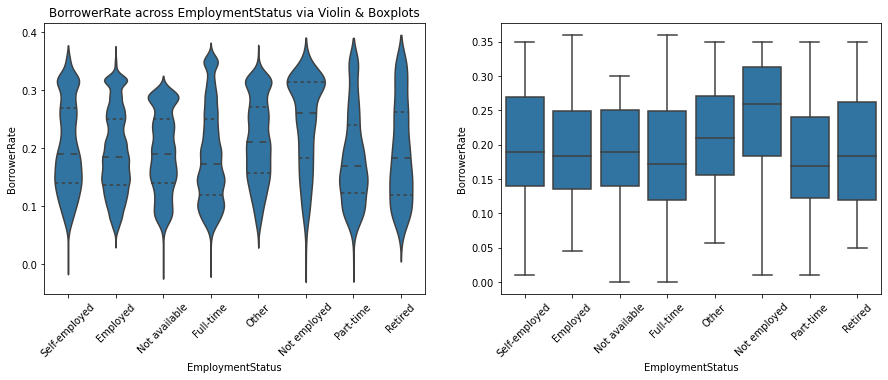

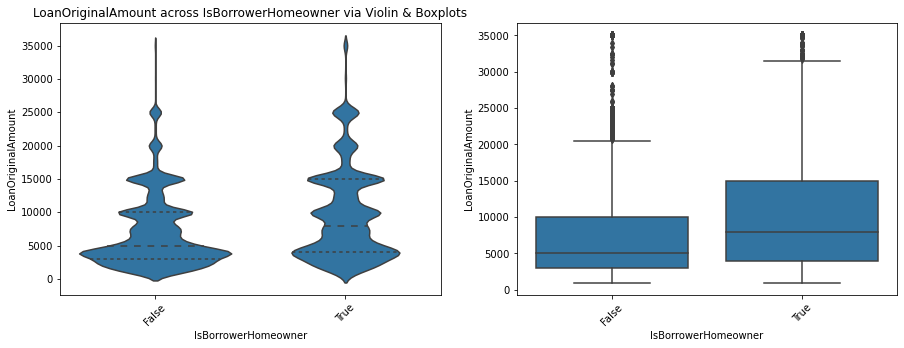

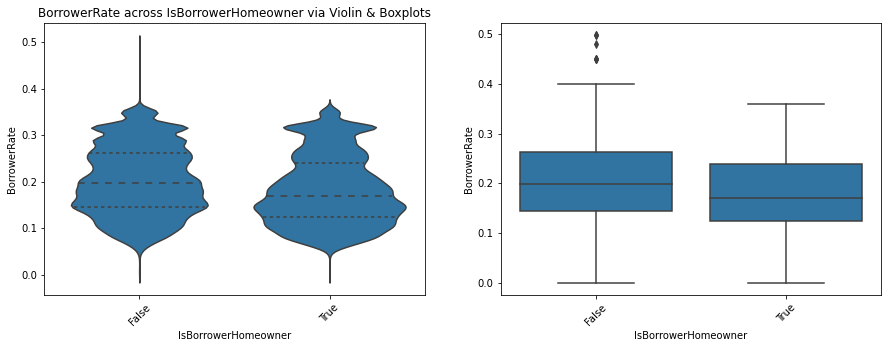

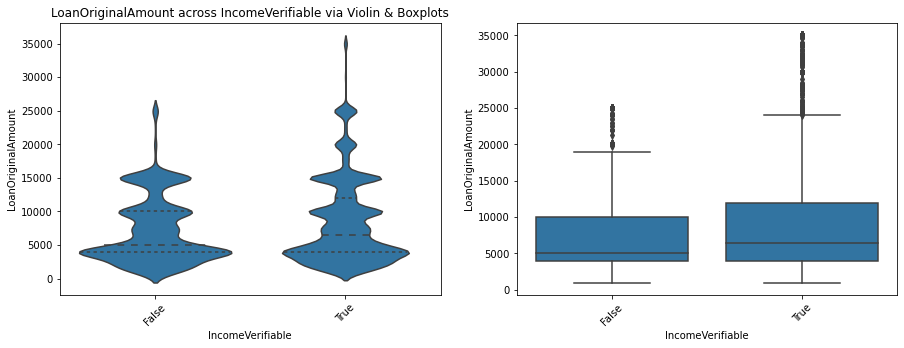

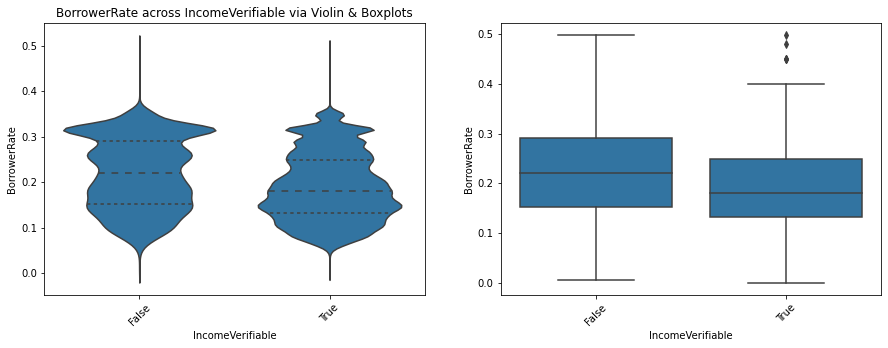

In [45]:
for var1 in ['EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']:
    for var2 in ['LoanOriginalAmount', 'BorrowerRate']:
        plt.figure(figsize = [15, 5])

        # LEFT plot: violin plot
        plt.subplot(1, 2, 1)
        sb.violinplot(data = dfx, x = var1, y = var2, inner = 'quartile', color=base_color);
        plt.xticks(rotation=45);
        plt.title(f'{var2} across {var1} via Violin & Boxplots');

        # RIGHT plot: box plot
        plt.subplot(1, 2, 2)
        sb.boxplot(data = dfx, x = var1, y = var2,  color=base_color);
        plt.xticks(rotation=45);

1- As Expected the Top 3 Employment Status **"Employed, Self-employed, Full-time"** have the highest average Loan Original Amount, AND The **Not-employed** has the highest average Borrow Rate.

2- The **Home Owner Borrowers** have higher Loan Original Amount on average, AND lower Borrow Rate on averager THAN Non Home Owner.

3- The **True Income Verifiable** have higher Loan Original Amount on average, AND lower Borrow Rate on averager THAN False Income Verifiable.

### 15, 16- Do the different types of Employment Status have differ also in  Total Prosper Loans and Recommendations?

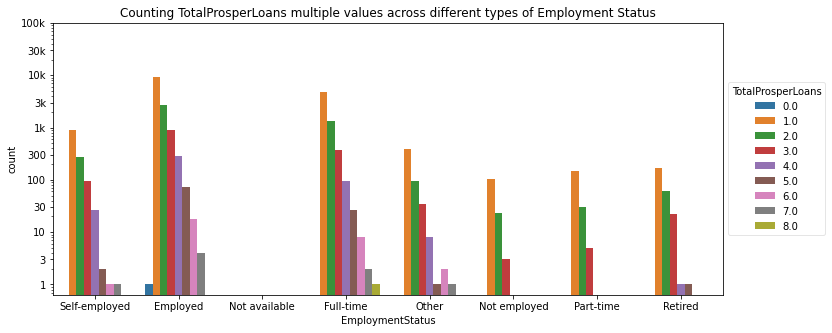

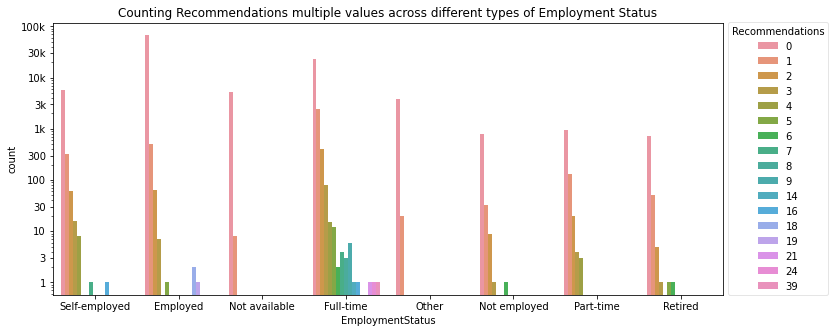

In [47]:
for var in ['TotalProsperLoans', 'Recommendations']:
    plt.figure(figsize = [12, 5])
    sb.countplot(data = dfx, x = 'EmploymentStatus', hue = var);

    plt.yscale('log')
    plt.yticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000], [1, 3, 10, 30, 100, 300, '1k', '3k', '10k', '30k', '100k']); 
    
    plt.title(f'Counting {var} multiple values across different types of Employment Status');
    
    plt.legend(title = var, bbox_to_anchor = (1, 0.5), loc = 6, framealpha = 0.5);

As expected Top 3 Employment Status **"Employed, Self-employed, Full-time"** have the highest Values & Variety of Values for both Total Prosper Loans AND Recommendations.

### 17, 18- Do the different types of Employment Status differ also in the ratio of Owning Home and Income Verification?

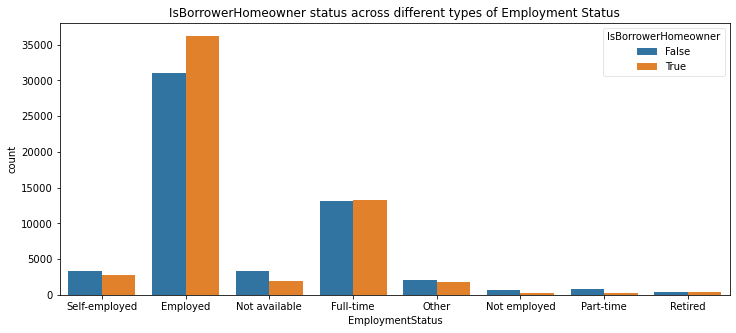

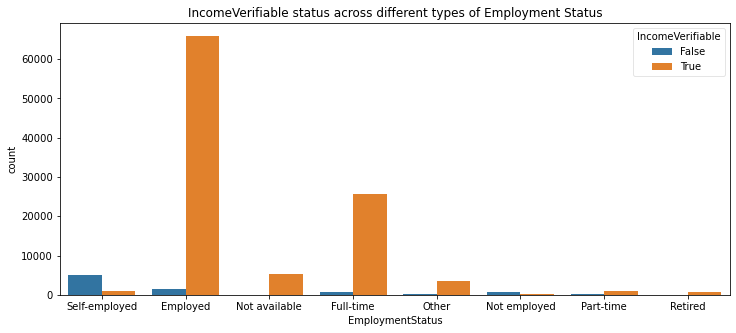

In [48]:
for var in ['IsBorrowerHomeowner', 'IncomeVerifiable']:
    
    plt.figure(figsize = [12, 5])

    sb.countplot(data = dfx, x = 'EmploymentStatus', hue = var);
    
    plt.title(f'{var} status across different types of Employment Status');

    plt.legend(title = var, framealpha = 0.5);

Employment Status of **"Employed"** has the highest ratio of Home Owner & Income Verifiable over all other EmploymentStatus.

### 19- What's the average income for different types of Occupations and how's the order look like?

In [51]:
sortedAvgIncome = dfx.groupby('Occupation').StatedMonthlyIncome.mean().sort_values(ascending=False)
sortedAvgIncome

Occupation
Doctor                         14936.942814
Attorney                       11570.032027
Judge                          10808.136364
Executive                      10737.978195
Dentist                        10548.066176
                                   ...     
Student - College Freshman      1608.469512
Student - Technical School      1369.130208
Student - College Senior        1299.652925
Student - College Junior        1190.162202
Student - College Sophomore     1005.289855
Name: StatedMonthlyIncome, Length: 67, dtype: float64

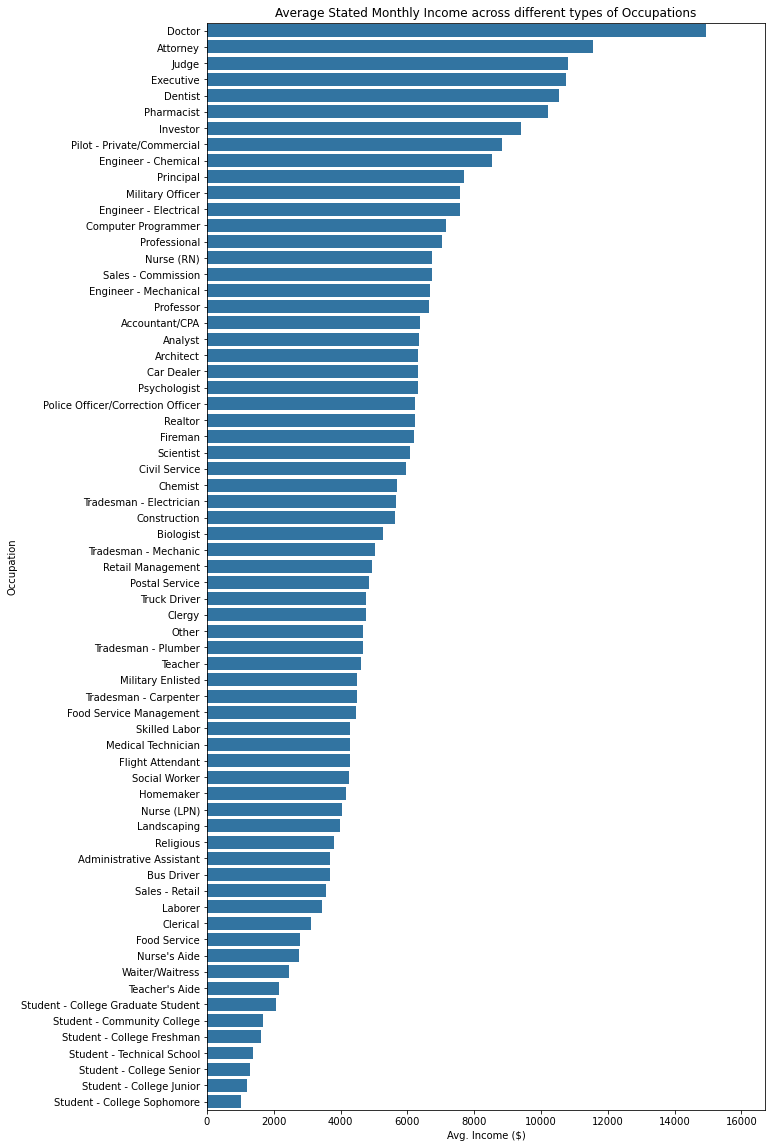

In [52]:
plt.figure(figsize = [10, 20])

base_color = sb.color_palette()[0]

sb.barplot(data=dfx, y='Occupation', x='StatedMonthlyIncome', errwidth = 0, color = base_color, order = sortedAvgIncome.index);

plt.xlabel('Avg. Income ($)');

plt.title('Average Stated Monthly Income across different types of Occupations');

Illustrating the sorted in descending way Average Incomes for the Occupations we have in our dataset.

**Doctor, Attorney, Judge, Executive, Dentist, Pharmacist .....**

## III-) Multivariate Exploration

In [53]:
np.random.seed(2018)
sample = np.random.choice(dfx.shape[0], 500, replace = False)
dfxSub = dfx.loc[sample]
dfxSub.shape

(500, 14)

### 1, 2- What will be the distribution of Home Owners & Non Home Owners AND ALSO the distribution of Income Verifiable Borrowers & Non Income Verifiable Borrowers ALONG the relationship between Stated Monthly Income & Loan Original Amount ? Which type will make a higher Loan Original Amount?

<ipython-input-57-d49bc1f507e3>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, count+1)
<ipython-input-57-d49bc1f507e3>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, count+1)


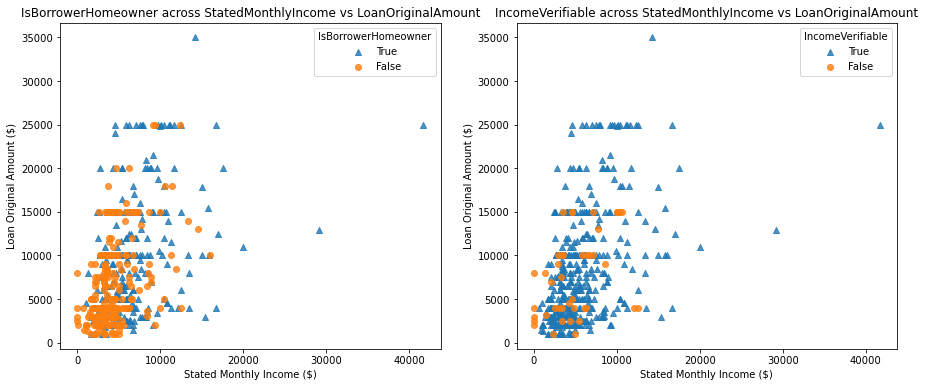

In [57]:
varList = ['IsBorrowerHomeowner', 'IncomeVerifiable']

plt.figure(figsize = [15, 6])

vaLList = [[True, '^'], [False, 'o']]

count = 0
for var in varList:
    for val, mrk in vaLList:
            plotData = dfxSub.loc[dfxSub[var] == val]
            
            plt.subplot(1, 2, count+1)
            sb.regplot(data = plotData, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount',
                       x_jitter = 0.3, fit_reg = False, marker = mrk);
    plt.xlabel('Stated Monthly Income ($)');
    plt.ylabel('Loan Original Amount ($)');
    plt.title(f'{var} across StatedMonthlyIncome vs LoanOriginalAmount');

    plt.legend(['True', 'False'], title = var);
    count += 1

- Over the positive relationship between Stated Monthly Income AND Loan Original Amount, as the both increase --> we can observe .. **the majority of higher loans are Home Owners. AND Income Verifiable**

### 3, 4- How the increasing of Stated Monthly Income & Loan Original Amount will affect the Borrower Rate AND what will be the more suitable Term for higher  Loan Original Amount?

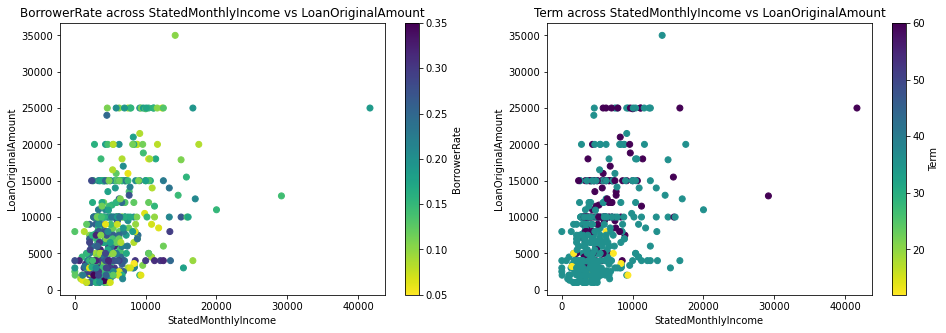

In [58]:
varList = ['BorrowerRate', 'Term']

plt.figure(figsize = [16, 5])

count = 0
for var in varList:
    plt.subplot(1, 2, count+1)
    
    plt.scatter(data = dfxSub, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', c = var, cmap = 'viridis_r');
    plt.colorbar(label = var);

    plt.xlabel('StatedMonthlyIncome');
    plt.ylabel('LoanOriginalAmount');
    plt.title(f'{var} across StatedMonthlyIncome vs LoanOriginalAmount');
    
    count += 1

Over the positive relationship between Stated Monthly Income AND Loan Original Amount, as the both increase --> we can observe **decreasing in Borrower Rate** AND **increasing in the Term**

### 5- How does the Borrower Rate affected by the Loan Original Amount & the Monthly Loan Payment?

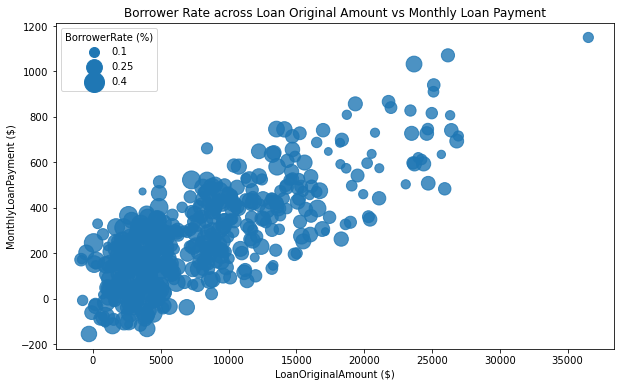

In [59]:
# 5- LoanOriginalAmount vs MonthlyLoanPayment vs BorrowerRate

plt.figure(figsize = [10, 6])

sb.regplot(data = dfxSub, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', x_jitter = 2000, y_jitter = 200, fit_reg = False,
           scatter_kws = {'s' : dfxSub['BorrowerRate'] * 1000});

plt.xlabel('LoanOriginalAmount ($)');
plt.ylabel('MonthlyLoanPayment ($)');
plt.title('Borrower Rate across Loan Original Amount vs Monthly Loan Payment');

# dummy series for adding legend
sizes = [0.1, 0.25, 0.4]
legend_obj = []
base_color = sb.color_palette()[0]
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s * 1000, color = base_color))
plt.legend(legend_obj, sizes, title = 'BorrowerRate (%)');

As expected over the positive relationship between Loan Original Amount AND Monthly Loan Payment, as the both increase --> **Borrower Rate will decreases**

### 6- How do the different types of Employment Status distributed among diiferent types of Loan Listing Category AND the relationshp with Loan Original Amount? Do certain types of Loan Listing Category not affected by the type of Employment Status?

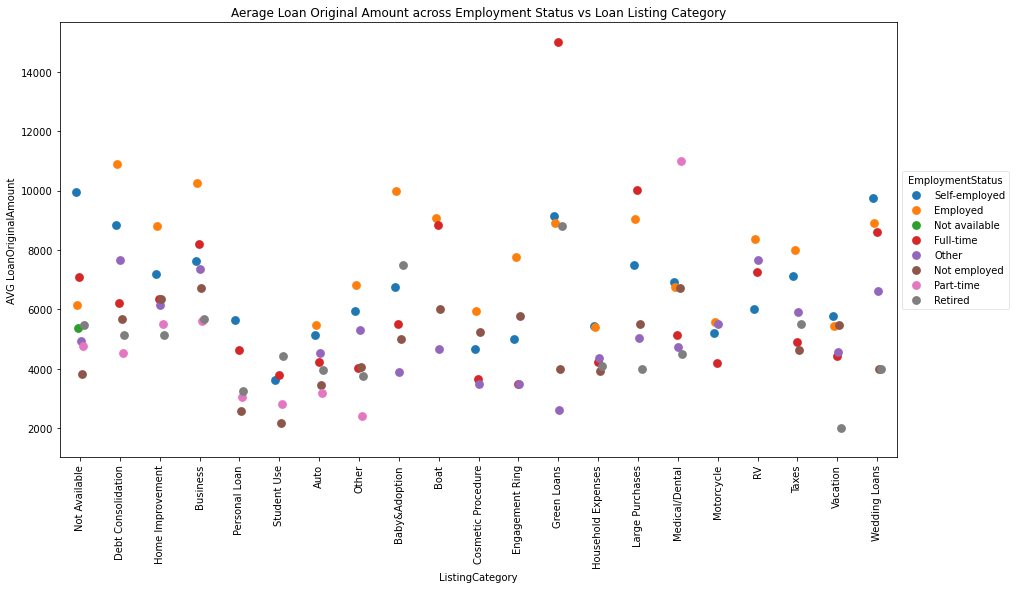

In [60]:
plt.figure(figsize = [15, 8])

sb.pointplot(data = dfx, x = 'ListingCategory', y = 'LoanOriginalAmount', hue = 'EmploymentStatus',
             linestyles = "", dodge = True, errwidth = 0);

plt.xticks(rotation = 90)
plt.ylabel('AVG LoanOriginalAmount');
plt.title('Aerage Loan Original Amount across Employment Status vs Loan Listing Category');

plt.legend(title = 'EmploymentStatus', bbox_to_anchor = (1, 0.5), loc = 6, framealpha = 0.5);

The highest Loan Original Amount on average for nearly all ListingCategory, are the top 3 Employment Status as expected **Employed, Self_employed, Full-time** except in very few categories like Medical/Dental & Student Use

Also we could notice large gaps in average Loan Original Amounts between different Employment Status in Listing Category like **Debt Consolidation, Baby&Adoption, Large Purchases**



### 7- What's the distribution of the average Loan Original Amount ALONG the different types of Employment Status & the Loan Listing Category?

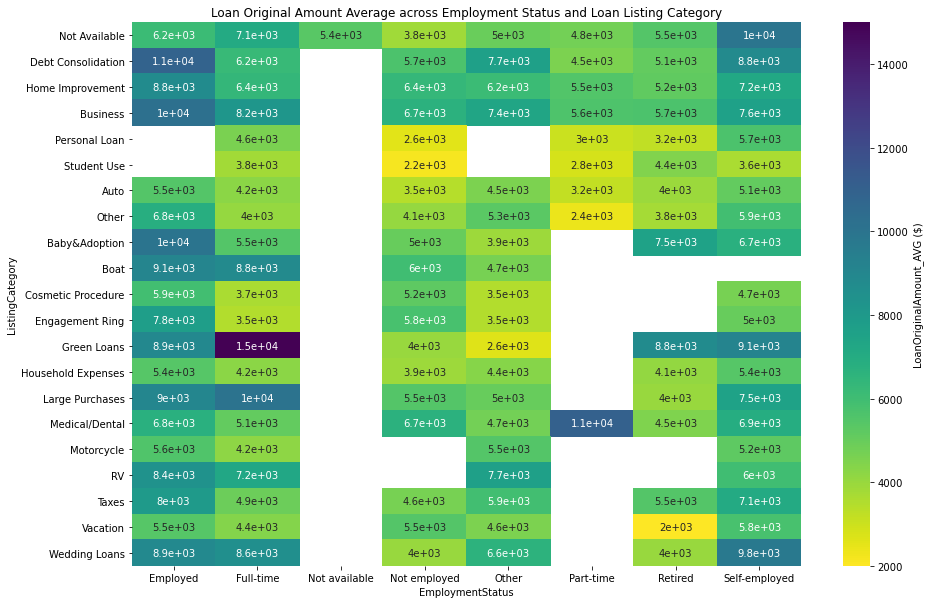

In [61]:
plt.figure(figsize = [15, 10])

varMeans = dfx.groupby(['EmploymentStatus', 'ListingCategory']).mean()['LoanOriginalAmount']
varMeans = varMeans.reset_index(name = 'LoanOriginalAmount_AVG')
varMeans = varMeans.pivot(index = 'ListingCategory', columns = 'EmploymentStatus',
                            values = 'LoanOriginalAmount_AVG')
sb.heatmap(varMeans, cbar_kws = {'label' : 'LoanOriginalAmount_AVG ($)'},
           cmap = 'viridis_r', annot = True);
plt.title('Loan Original Amount Average across Employment Status and Loan Listing Category');

Higher LoanOriginalAmount on Average can be observed along some Employment Status like **Employed, Self_employed, Full-Time** and along some Listing Category like **Debt Consolidation, Home Improvement, Business, Large Purchases, Medical/Dental, Wedding Loans**